Dataset Specifications:
Number of samples: 111
Number of columns: 22278
Number of labels: 0
Dimensions of the dataset: (111, 22278)
Number of columns in the dataset: 22278
Total number of numeric feature columns: 22278
Number of unique numeric feature columns: 14236

Dimensions of X: (111, 49112)
Dimensions of y: (111,)

Checking if normalization is required...
Normalization is required.

Decision Tree Classifier Accuracy: 1.00

Confusion Matrix:
[[15  0]
 [ 0 19]]


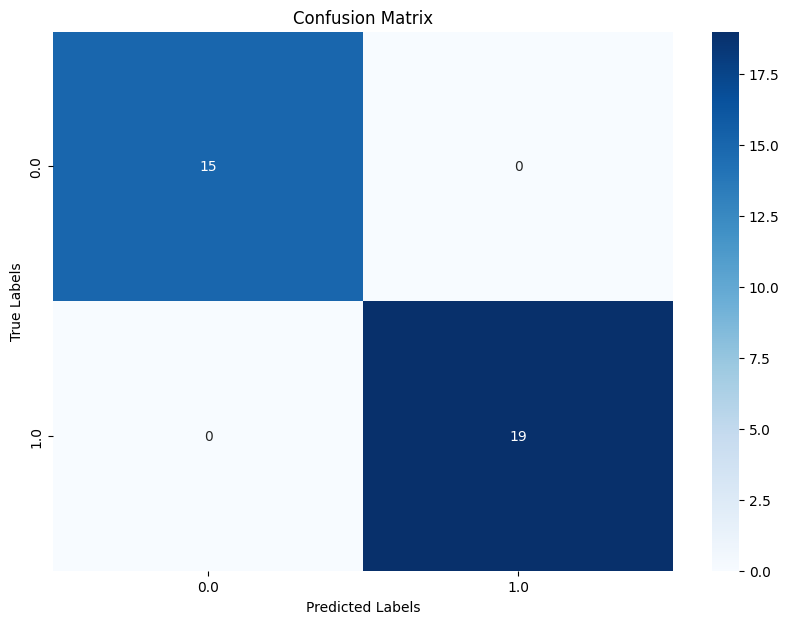

In [3]:
# 1. Explain why the first code cell results in a perfect accuracy of
#    1.00 and the following confusion matrix:

# [[15 0]
#  [0 19]]

#  The accuracy here is perfect because the y target was selected during the feature selection here
#  feature_columns = data.select_dtypes(include=[np.number]).columns.tolist()
#  So, during the splitting it has been included in the X variable
#  X = data[feature_columns]

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dataset_path = 'dataset_GSE44861'

# Check if the file exists
if not os.path.exists(dataset_path):
    print(f"File not found: {dataset_path}")
else:
    # Read the dataset from a pickle file
    data = pd.read_pickle(dataset_path)

    # Print dataset specifications
    print("Dataset Specifications:")
    print(f"Number of samples: {data.shape[0]}")
    print(f"Number of columns: {data.shape[1]}")
    print(f"Number of labels: {len(data.select_dtypes(include=['object', 'category']).columns)}")
    # print("\nData Preview:")
    # print(data.head())

    # Print the dimensions of the data
    print(f"Dimensions of the dataset: {data.shape}")

    # Use iloc to access the columns and print the number of columns
    number_of_columns = data.iloc[0, :].size

    print(f"Number of columns in the dataset: {number_of_columns}")


    # Check for normalization requirement (if any feature has variance > 1, normalization is needed)
    feature_columns = data.select_dtypes(include=[np.number]).columns.tolist()

        # Find unique column names in feature_columns
    unique_feature_columns = pd.Index(feature_columns).unique()

    # Print the total number of feature columns
    print(f"Total number of numeric feature columns: {len(feature_columns)}")

    # Print the number of unique feature columns
    print(f"Number of unique numeric feature columns: {len(unique_feature_columns)}")


    X = data[feature_columns]
    # X=X.iloc[:, :20]

    # Assuming the last column contains labels
    target_column = data.columns[-1]
    y = data[target_column]


    # Print dimensions of X and y
    print(f"\nDimensions of X: {X.shape}")
    print(f"Dimensions of y: {y.shape}")



    print("\nChecking if normalization is required...")
    if X.var().max() > 1:
        print("Normalization is required.")
        scaler = StandardScaler()
        X_normalized = scaler.fit_transform(X)
    else:
        print("Normalization is not required.")
        X_normalized = X.values



    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=427576)

    # Train a Decision Tree Classifier without PCA
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nDecision Tree Classifier Accuracy: {accuracy:.2f}")

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



Number of samples per label type:
label
1.0    56
0.0    55
Name: count, dtype: int64

Checking if normalization is required...
Normalization is required.

Decision Tree Classifier Accuracy: 0.76

Confusion Matrix:
[[13  3]
 [ 5 13]]


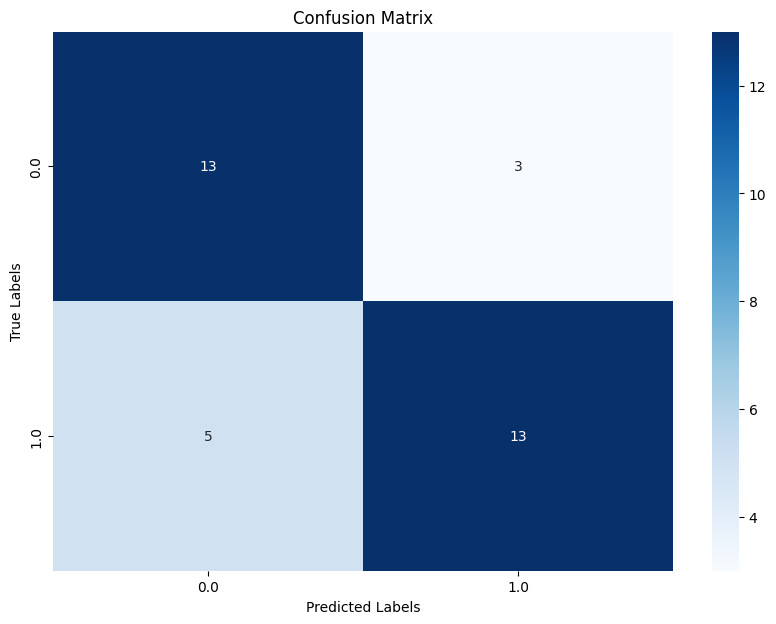


Feature Importance:


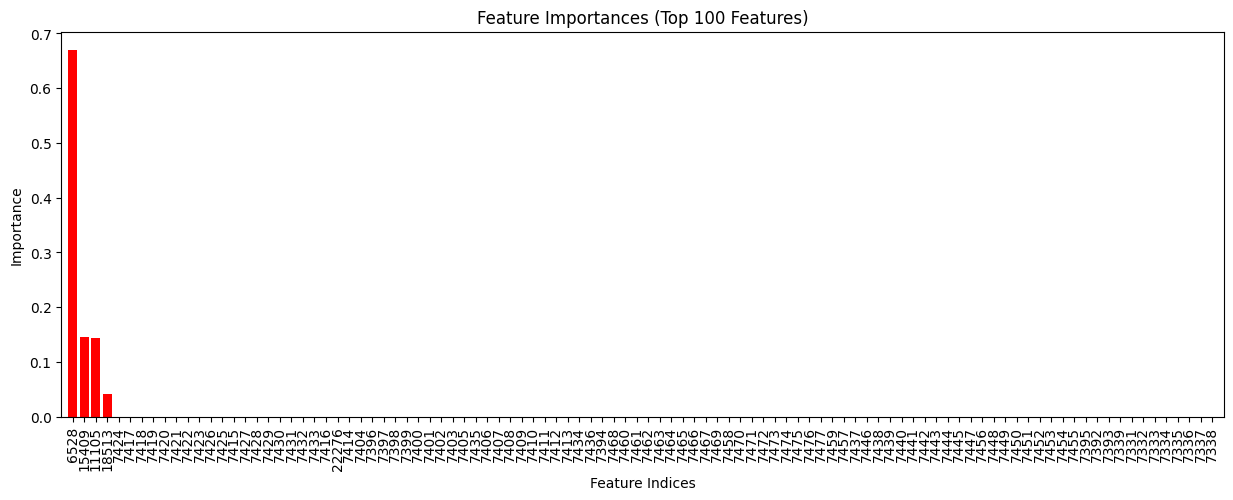

Number of features used to build the model: 4


In [4]:
# 2. Compare and explain why the second code cell results in a lower accuracy 
# of 0.76 with the following confusion matrix:
# [[13 3]
#  [ 5 13]]

# The split here excluded the target y variable from X.
# Separate features (X) and target labels (y)
    # X = data.iloc[:, :-1]  # All columns except the last column
    # y = data[target_column]  # The last column is assumed to be the target label


# Check if the file exists
if not os.path.exists(dataset_path):
    print(f"File not found: {dataset_path}")
else:
    # Read the dataset from a pickle file
    data = pd.read_pickle(dataset_path)


    # Check for normalization requirement (if any feature has variance > 1, normalization is needed)
    feature_columns = data.select_dtypes(include=[np.number]).columns.tolist()
    features = data[feature_columns]

    # Assuming the last column contains labels
    target_column = data.columns[-1]

    # Separate features (X) and target labels (y)
    X = data.iloc[:, :-1]  # All columns except the last column
    y = data[target_column]  # The last column is assumed to be the target label


    # Print the number of samples per label type
    label_counts = y.value_counts()
    print("\nNumber of samples per label type:")
    print(label_counts)

    print("\nChecking if normalization is required...")
    if features.var().max() > 1:
        print("Normalization is required.")
        scaler = StandardScaler()
        X_normalized = scaler.fit_transform(X)
    else:
        print("Normalization is not required.")
        X_normalized = X.values  # No normalization applied

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=76)

    # Train a Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nDecision Tree Classifier Accuracy: {accuracy:.2f}")

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Feature importance from the Decision Tree model
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("\nFeature Importance:")
    # Report only the first 100 features or all features if there are fewer than 100
    max_features = min(100, X_train.shape[1])

    # Plot feature importances for the first 100 features
    plt.figure(figsize=(15, 5))  # Adjusted for better fit of up to 100 features
    plt.title('Feature Importances (Top 100 Features)')
    plt.bar(range(max_features), importances[indices][:max_features], color="r", align="center")
    plt.xticks(range(max_features), indices[:max_features], rotation='vertical')
    plt.xlim([-1, max_features])
    plt.xlabel('Feature Indices')
    plt.ylabel('Importance')
    plt.show()

    # Number of features used
    n_features_used = np.sum(importances > 0)
    print(f"Number of features used to build the model: {n_features_used}")

In [ ]:
# Issue: Target variable y was included in X.
# Consequence: Model learns to "predict" y by directly accessing it in X.
# Result: Unrealistically high accuracy (1.00) due to data leakage.


# This is where the leakage happened 
# feature_columns = data.select_dtypes(include=[np.number]).columns.tolist()
# X = data[feature_columns]

# # Assuming the last column contains labels
# target_column = data.columns[-1]
# y = data[target_column]

# In the following code I excluded the target variable form the X in the split.
# target_column = data.columns[-1]

Dataset Specifications:
Number of samples: 111
Number of columns: 22278
Number of labels: 0
Dimensions of the dataset: (111, 22278)
Number of columns in the dataset: 22278
Total number of numeric feature columns: 22278
Number of unique numeric feature columns: 14236
Total number of numeric feature columns: 22277
Number of unique numeric feature columns: 14236

Dimensions of X: (111, 49111)
Dimensions of y: (111,)

Checking if normalization is required...
Normalization is required.

Decision Tree Classifier Accuracy: 0.79

Confusion Matrix:
[[13  2]
 [ 5 14]]


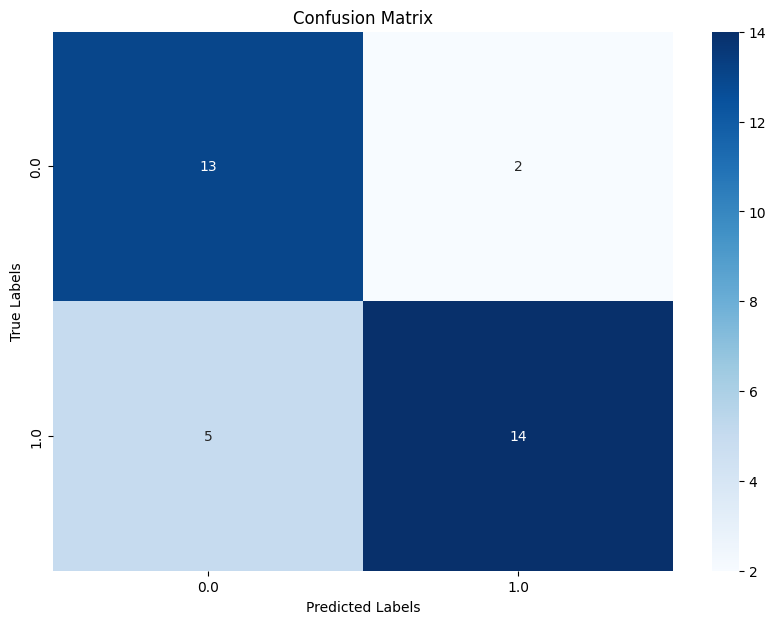

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dataset_path = 'dataset_GSE44861'

# Check if the file exists
if not os.path.exists(dataset_path):
    print(f"File not found: {dataset_path}")
else:
    # Read the dataset from a pickle file
    data = pd.read_pickle(dataset_path)

    # Print dataset specifications
    print("Dataset Specifications:")
    print(f"Number of samples: {data.shape[0]}")
    print(f"Number of columns: {data.shape[1]}")
    print(f"Number of labels: {len(data.select_dtypes(include=['object', 'category']).columns)}")
    # print("\nData Preview:")
    # print(data.head())

    # Print the dimensions of the data
    print(f"Dimensions of the dataset: {data.shape}")

    # Use iloc to access the columns and print the number of columns
    number_of_columns = data.iloc[0, :].size

    print(f"Number of columns in the dataset: {number_of_columns}")


    # Check for normalization requirement (if any feature has variance > 1, normalization is needed)
    feature_columns = data.select_dtypes(include=[np.number]).columns.tolist()
    

        # Find unique column names in feature_columns
    unique_feature_columns = pd.Index(feature_columns).unique()

    # Print the total number of feature columns
    print(f"Total number of numeric feature columns: {len(feature_columns)}")

    # Print the number of unique feature columns
    print(f"Number of unique numeric feature columns: {len(unique_feature_columns)}")


    # X = data[feature_columns]
    # X=X.iloc[:, :20]

    # Assuming the last column contains labels
    target_column = data.columns[-1]
    # y = data[target_column]

    feature_columns.remove(target_column)  # Exclude the target column


     # Print the total number of feature columns
    print(f"Total number of numeric feature columns: {len(feature_columns)}")

    # Print the number of unique feature columns
    print(f"Number of unique numeric feature columns: {len(unique_feature_columns)}")

    X = data[feature_columns]
    y = data[target_column]



    # Print dimensions of X and y
    print(f"\nDimensions of X: {X.shape}")
    print(f"Dimensions of y: {y.shape}")



    print("\nChecking if normalization is required...")
    if X.var().max() > 1:
        print("Normalization is required.")
        scaler = StandardScaler()
        X_normalized = scaler.fit_transform(X)
    else:
        print("Normalization is not required.")
        X_normalized = X.values



    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=427576)

    # Train a Decision Tree Classifier without PCA
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nDecision Tree Classifier Accuracy: {accuracy:.2f}")

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
